In [1]:
#Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Đọc dữ liệu csv
data = pd.read_csv('Thyroid_Diff.csv')
data.shape

(384, 17)

In [3]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# Phân tích dữ liệu và làm sạch dữ liệu

## Phân tích dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   384 non-null    int64 
 1   Gender                384 non-null    object
 2   Smoking               384 non-null    object
 3   Hx Smoking            384 non-null    object
 4   Hx Radiothreapy       384 non-null    object
 5   Thyroid Function      384 non-null    object
 6   Physical Examination  384 non-null    object
 7   Adenopathy            384 non-null    object
 8   Pathology             384 non-null    object
 9   Focality              384 non-null    object
 10  Risk                  384 non-null    object
 11  T                     383 non-null    object
 12  N                     384 non-null    object
 13  M                     384 non-null    object
 14  Stage                 384 non-null    object
 15  Response              384 non-null    ob

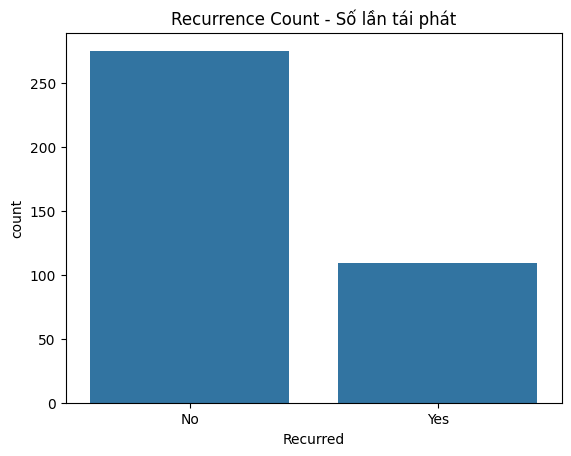

In [5]:
sns.countplot(x='Recurred', data=data)
plt.title('Recurrence Count - Số lần tái phát')
plt.show()

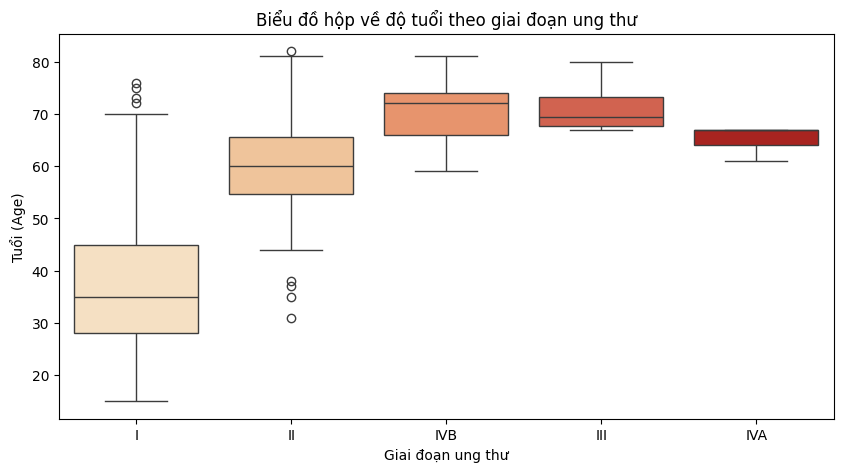

In [6]:
# Tạo lưới 1x1 cho biểu đồ hộp
fig, ax = plt.subplots(figsize=(10, 5))

# Biểu đồ hộp cho Giai đoạn ung thư (Stage)
sns.boxplot(x='Stage', y='Age', data=data, palette="OrRd", ax=ax)
ax.set_title('Biểu đồ hộp về độ tuổi theo giai đoạn ung thư')
ax.set_xlabel('Giai đoạn ung thư')
ax.set_ylabel('Tuổi (Age)')

plt.show()

Trong đó:
- Giai đoạn I: Khối u có đường kính dưới 2 cm và vẫn nằm trong giới hạn của tuyến giáp, chưa lan rộng đến các hạch bạch huyết gần đó hay các cơ quan khác.
- Giai đoạn II: Khối u có kích thước từ 2 cm đến 4 cm, có thể vẫn nằm trong tuyến giáp hoặc phát triển ra ngay bên ngoài, nhưng không lan đến các hạch bạch huyết hoặc cơ quan khác.
- Giai đoạn III: Kích thước khối u không xác định, nhưng tế bào ung thư đã lan đến các hạch bạch huyết gần đó, tuy nhiên vẫn chưa di căn đến các cơ quan khác.
- Giai đoạn IVA: Khối u có thể có kích thước bất kỳ, đã phát triển ra ngoài tuyến giáp và ảnh hưởng đến các cấu trúc quan trọng như khí quản, thực quản và các dây thần kinh. Các tế bào ung thư cũng có thể đã lan đến các hạch bạch huyết gần đó, nhưng chưa di căn đến các cơ quan xa hơn.
- Giai đoạn IVB: Kích thước khối u không xác định. Tế bào ung thư đã lan đến các mạch máu gần đó hoặc các mô xung quanh cột sống, nhưng chưa lan đến các cơ quan khác.

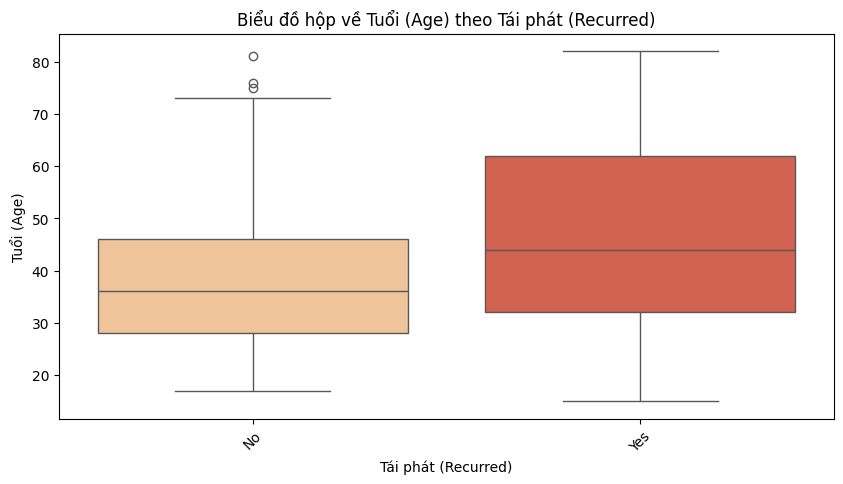

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(x='Recurred', y='Age', data=data, palette="OrRd", ax=ax)
ax.set_title('Biểu đồ hộp về Tuổi (Age) theo Tái phát (Recurred)') 
ax.set_xlabel('Tái phát (Recurred)')
ax.set_ylabel('Tuổi (Age)')
ax.tick_params(axis='x', rotation=45)

Text(0.5, 1.0, 'Phân phối tuổi theo trạng thái tái phát')

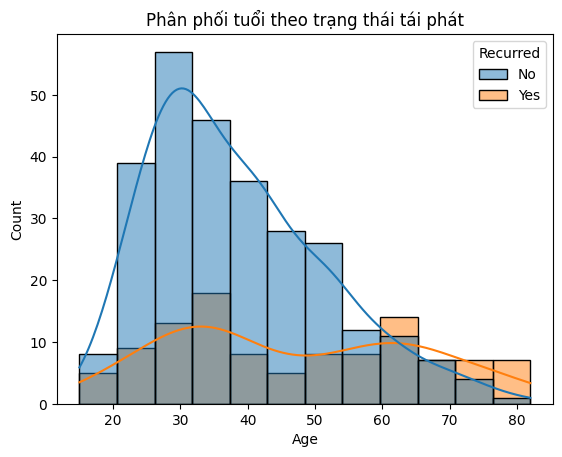

In [8]:
sns.histplot(x = 'Age',hue='Recurred',data=data,kde=True)
plt.title('Phân phối tuổi theo trạng thái tái phát')

Text(0, 0.5, 'Count - Số lượng')

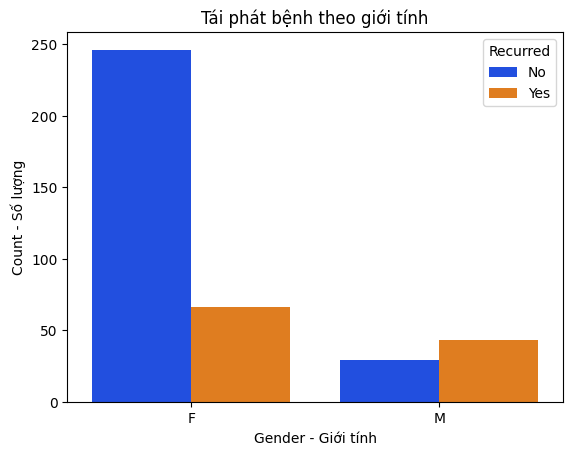

In [9]:
sns.countplot(x="Gender", hue="Recurred", data=data, palette='bright')
plt.title("Tái phát bệnh theo giới tính")
plt.xlabel('Gender - Giới tính')
plt.ylabel('Count - Số lượng')

Text(0.5, 1.0, 'Phân phối tuổi theo giai đoạn và giới tính')

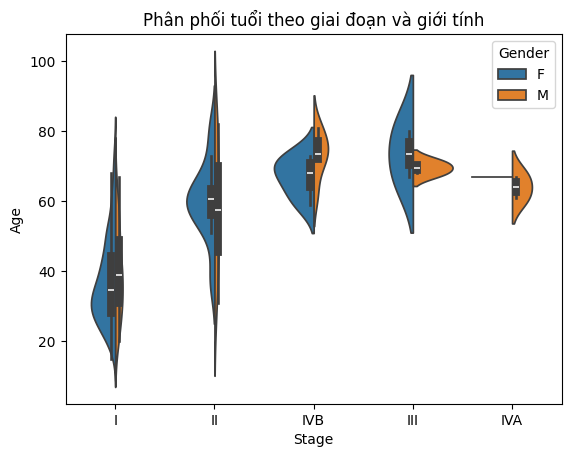

In [10]:
sns.violinplot(x ='Stage', y ='Age', data = data, hue ='Gender', split = True)
plt.title('Phân phối tuổi theo giai đoạn và giới tính')

Text(0, 0.5, 'Count - Số lượng')

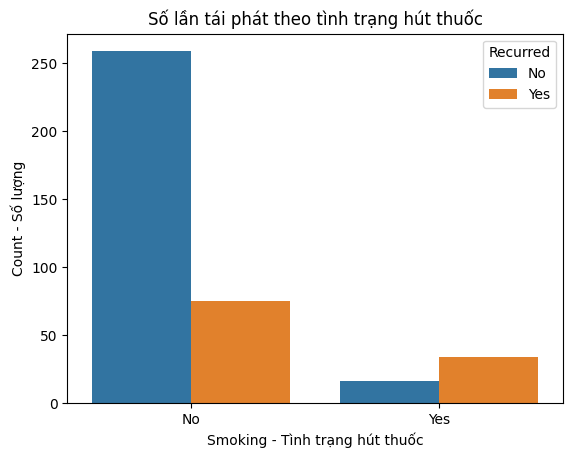

In [11]:
sns.countplot(x='Smoking', hue='Recurred', data=data)

plt.title('Số lần tái phát theo tình trạng hút thuốc')
plt.xlabel('Smoking - Tình trạng hút thuốc')
plt.ylabel('Count - Số lượng')

Text(0, 0.5, 'Count - Số lượng')

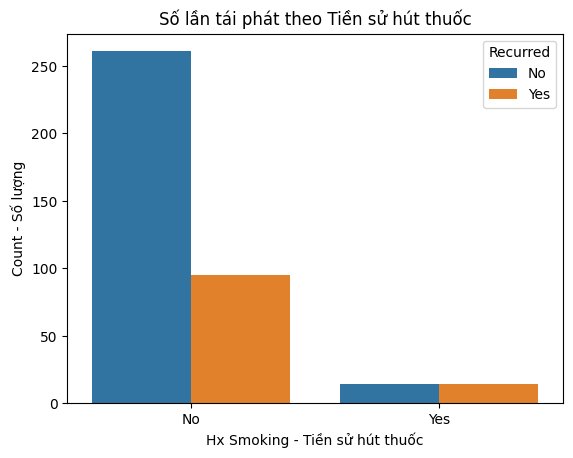

In [12]:
sns.countplot(x='Hx Smoking', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Tiền sử hút thuốc')
plt.xlabel('Hx Smoking - Tiền sử hút thuốc')
plt.ylabel('Count - Số lượng')

Text(0, 0.5, 'Count - Số lượng')

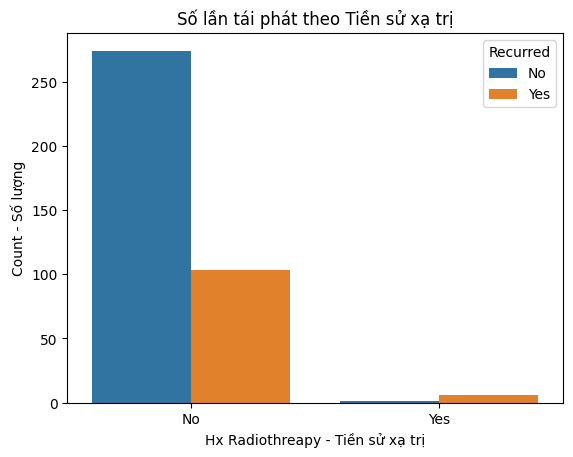

In [13]:
sns.countplot(x='Hx Radiothreapy', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Tiền sử xạ trị')
plt.xlabel('Hx Radiothreapy - Tiền sử xạ trị')
plt.ylabel('Count - Số lượng')

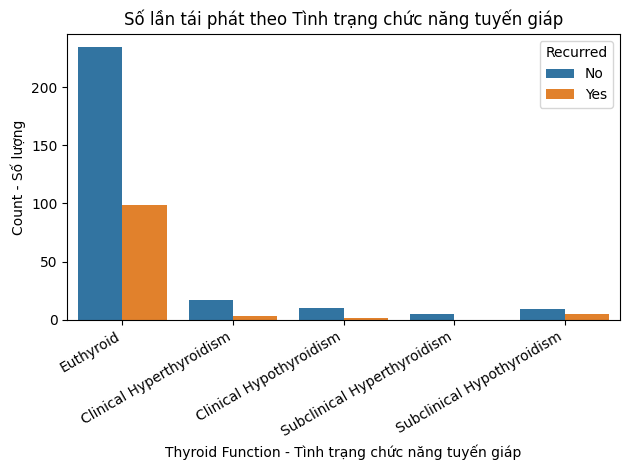

In [14]:
sns.countplot(x='Thyroid Function', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Tình trạng chức năng tuyến giáp')
plt.xlabel('Thyroid Function - Tình trạng chức năng tuyến giáp')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right')  

plt.tight_layout()
plt.show()

Trong đó: 
- Euthyroid: Bình giáp
- Clinical Hyperthyroidism: Bệnh cường giáp lâm sàng
- Clinical Hypothyroidism: Suy giáp lâm sàng
- Subclinical Hyperthyroidism: Cường giáp dưới lâm sàng
- Subclinical Hypothyroidism: Suy giáp dưới lâm sàng

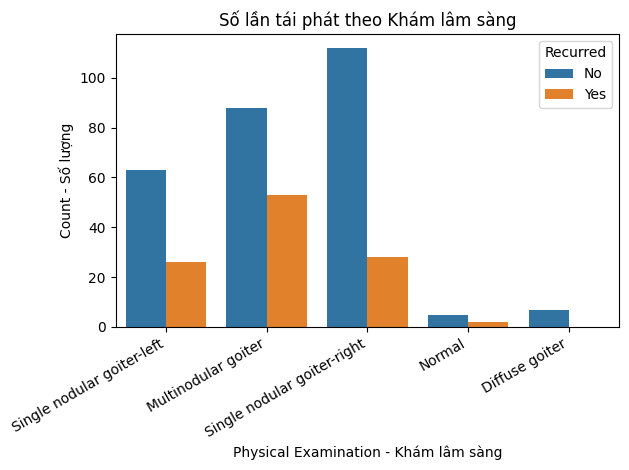

In [15]:
sns.countplot(x='Physical Examination', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Khám lâm sàng')
plt.xlabel('Physical Examination - Khám lâm sàng')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right') 

plt.tight_layout()
plt.show()

Trong đó:
- Single nodular goiter-left: Bướu cổ đơn nhân bên trái
- Multinodular goiter: Bướu cổ đa nhân
- Single nodular goiter-right: Bướu cổ đơn nhân bên phải
- Normal: Bình thường
- Diffuse goiter: Bướu cổ lan tỏa

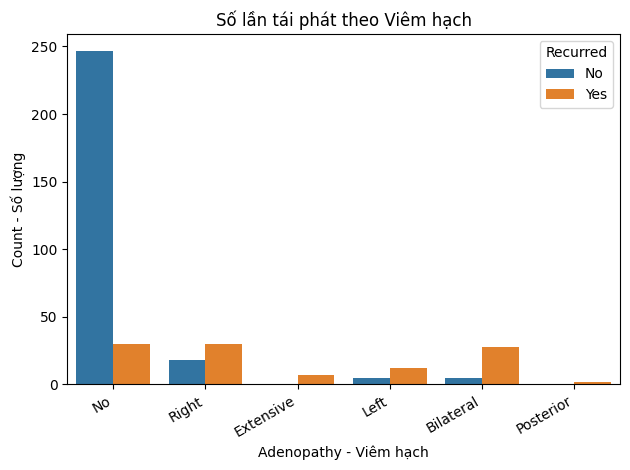

In [16]:
sns.countplot(x='Adenopathy', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Viêm hạch')
plt.xlabel('Adenopathy - Viêm hạch')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right') 

plt.tight_layout()
plt.show()

Trong đó:
- No: Không
- Right: Phải
- Extensive: Lan rộng
- Left: Trái
- Bilateral: Hai bên
- Posterior : Sau

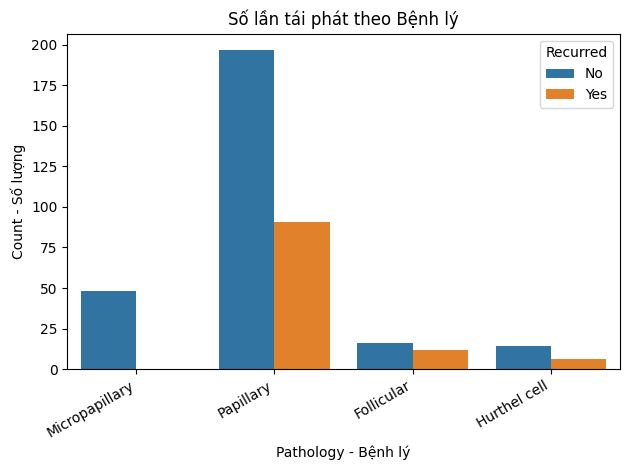

In [17]:
sns.countplot(x='Pathology', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Bệnh lý')
plt.xlabel('Pathology - Bệnh lý')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right')  

plt.tight_layout()
plt.show()

Trong đó:
- Micropapillary: vi nhú
- Papillary: nhú
- Follicular: nang trứng
- Hurthel cell: tế bào Hurthle

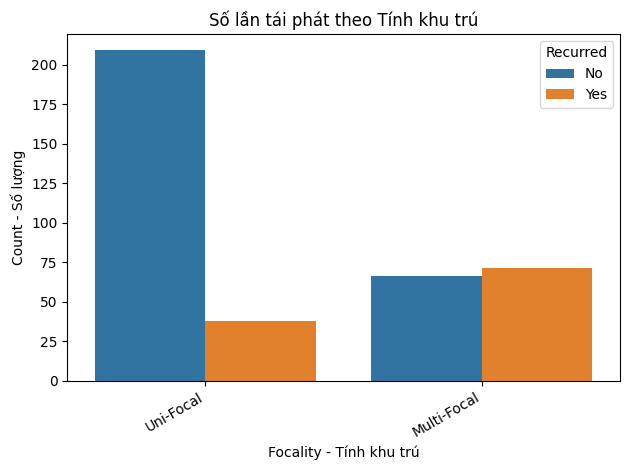

In [18]:
sns.countplot(x='Focality', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Tính khu trú')
plt.xlabel('Focality - Tính khu trú')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right') 

plt.tight_layout()
plt.show()

Trong đó:
- Uni-Focal: 1 điểm
- Multi-Focal: Đa điểm

Text(0, 0.5, 'Age - Tuổi')

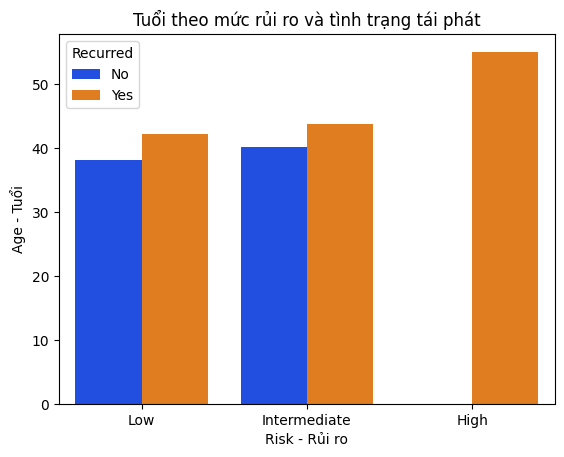

In [19]:
sns.barplot(data,x="Risk",y="Age",hue="Recurred", ci = None, palette = 'bright')
plt.title('Tuổi theo mức rủi ro và tình trạng tái phát')
plt.xlabel('Risk - Rủi ro')
plt.ylabel('Age - Tuổi')

Trong đó:
- Low: rủi ro thấp
- Intermediate: rủi ro mức trung
- High: rủi ro cao

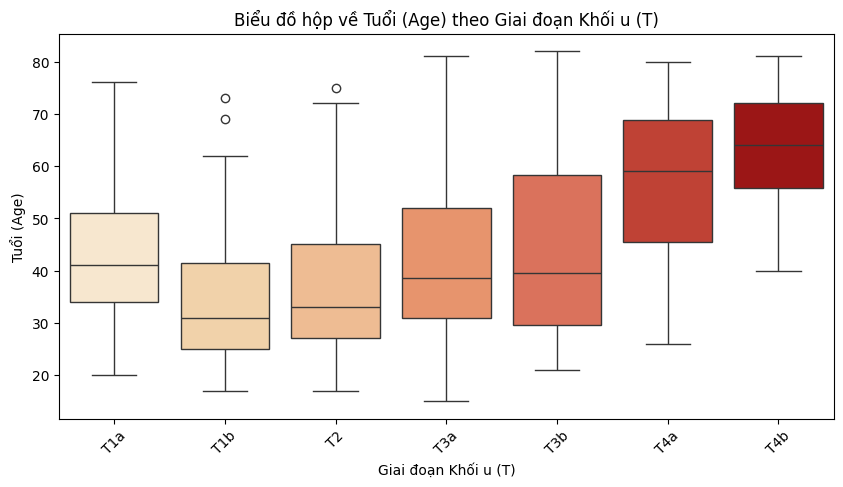

In [20]:
# Tạo lưới 1x1 cho các ô
fig, ax = plt.subplots(figsize=(10, 5))

# Biểu đồ hộp cho T
sns.boxplot(x='T', y='Age', data=data, palette="OrRd", ax=ax)
ax.set_title('Biểu đồ hộp về Tuổi (Age) theo Giai đoạn Khối u (T)') 
ax.set_xlabel('Giai đoạn Khối u (T)')
ax.set_ylabel('Tuổi (Age)')
ax.tick_params(axis='x', rotation=45)

plt.show()

Trong đó:
- 'T1a': khối u có kích thước 1 cm hoặc nhỏ hơn
- 'T1b': khối u lớn hơn 1 cm nhưng không lớn hơn 2 cm
- 'T2': khối u lớn hơn 2 cm nhưng không lớn hơn 4 cm
- 'T3a': khối u lớn hơn 4 cm 
- 'T3b': khối u phát triển bên ngoài tuyến giáp
- 'T4a': Khối u đã xâm lấn vào các cấu trúc gần đó.
- 'T4b': Khối u đã xâm lấn vào các cấu trúc quan trọng hơn, ví dụ như các cơ quan xa hoặc các cấu trúc xung quanh không thể dễ dàng loại bỏ hoặc điều trị.

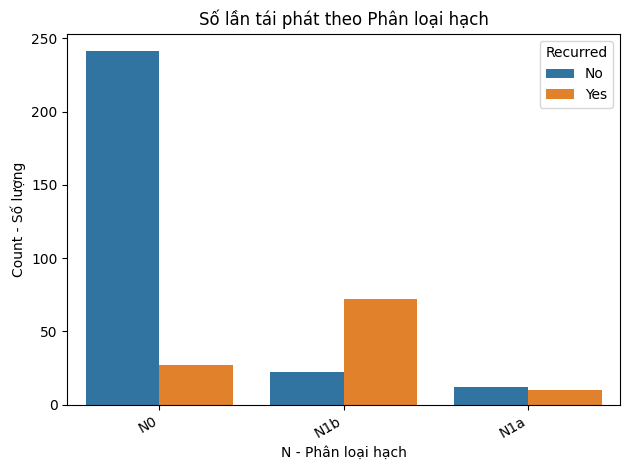

In [21]:
sns.countplot(x='N', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Phân loại hạch')
plt.xlabel('N - Phân loại hạch')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right')  

plt.tight_layout()
plt.show()

Trong đó:
- N0: Không có hạch bạch huyết khu vực nào bị ảnh hưởng.
- N1a và N1b: Tăng sự ảnh hưởng của hạch bạch huyết khu vực. 
    + N1a có thể chỉ ra sự ảnh hưởng tối thiểu của hạch
    + N1b có thể chỉ ra sự ảnh hưởng rộng rãi của hạch

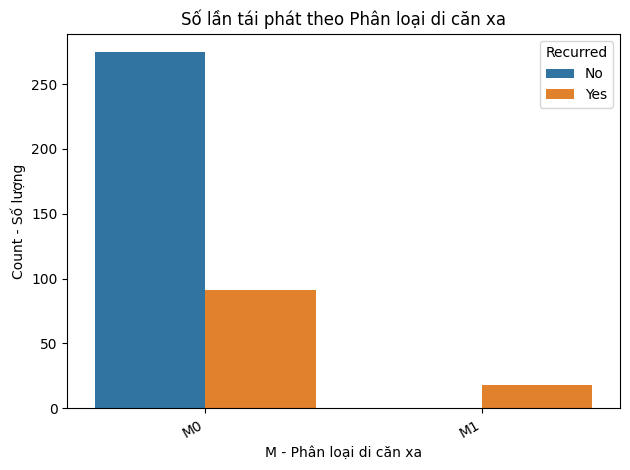

In [22]:
sns.countplot(x='M', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Phân loại di căn xa')
plt.xlabel('M - Phân loại di căn xa')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right')  
plt.tight_layout()
plt.show()

Trong đó:
- M0: Không có di căn xa.
- M1: Có di căn xa.

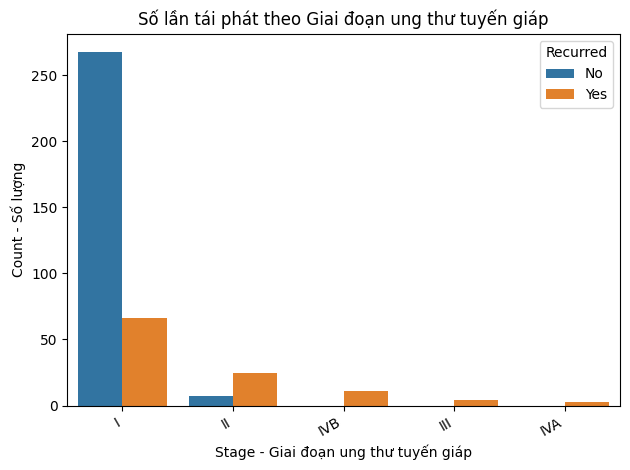

In [23]:
sns.countplot(x='Stage', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Giai đoạn ung thư tuyến giáp')
plt.xlabel('Stage - Giai đoạn ung thư tuyến giáp')
plt.ylabel('Count - Số lượng')

plt.xticks(rotation=30, ha='right')  
plt.tight_layout()
plt.show()

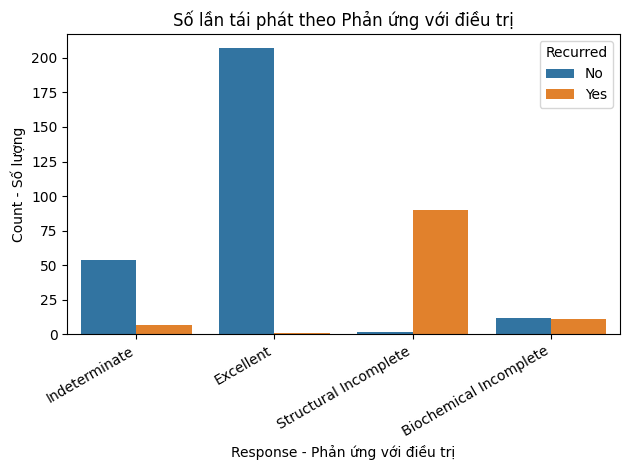

In [24]:
sns.countplot(x='Response', hue='Recurred', data=data)

plt.title('Số lần tái phát theo Phản ứng với điều trị')
plt.xlabel('Response - Phản ứng với điều trị')
plt.ylabel('Count - Số lượng')

# Xoay nhãn trục x
plt.xticks(rotation=30, ha='right')  # hoặc rotation=45 tùy độ dài

plt.tight_layout()
plt.show()

Trong đó:
- Indeterminate: không xác định
- Excellent: Xuất sắc
- Structural Incomplete: Cấu trúc chưa hoàn thiện
- Biochemical Incomplete: Sinh hóa chưa hoàn thiện

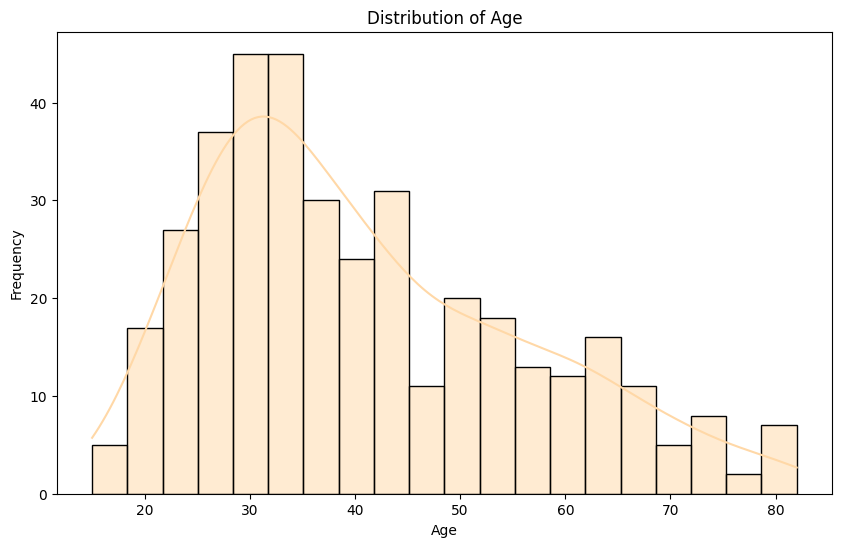

In [25]:
# Hình dung sự phân bố độ tuổi bằng biểu đồ.
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

## Làm sạch dữ liệu

### Kiểm tra và xử lý dữ liệu ngoại lai (nếu có)

In [26]:
#Kiểm tra các thước đo thống kê của dữ liệu
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,384.0,40.864583,15.114788,15.0,29.0,37.0,51.0,82.0


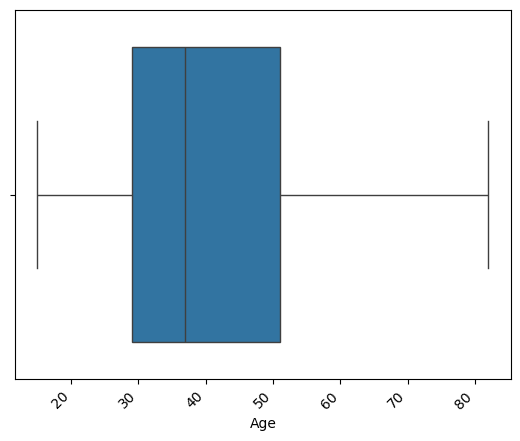

In [27]:
# Vẽ biểu đồ hộp cho cột 'Age' để kiểm tra các giá trị ngoại lai
sns.boxplot(x=data['Age'])

# Điều chỉnh khoảng cách và xoay chữ (nếu cần)
plt.xticks(rotation=45, ha='right')  # Xoay chữ 45 độ và căn chỉnh văn bản về phía phải

# Hiển thị hình vẽ
plt.show()


### Kiểm tra và xử lý dữ liệu thiếu

In [28]:
# Kiểm tra giá trị rỗng
missing_values = data.isnull().sum()
print("Số lượng giá trị rỗng trong mỗi cột:\n")
print(missing_values)

Số lượng giá trị rỗng trong mỗi cột:

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       1
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [29]:
# Xóa hàng chứa giá trị thiếu
data = data.dropna()

In [30]:
# In số lượng hàng và cột của dữ liệu sau khi xóa
print("Kích thước của dữ liệu sau khi xóa các hàng chứa giá trị thiếu:")
print(data.shape)

Kích thước của dữ liệu sau khi xóa các hàng chứa giá trị thiếu:
(383, 17)


### Kiêm tra và mã hóa biến phân loại

In [31]:
# xác định biến phân loại
categorical = data.dtypes == object

print(categorical)

# khi dtype == object thì là 'true'
print(categorical[categorical])
categorical_labels = categorical[categorical].index
print('Categorical variables:', categorical_labels)

# Khi dtype == object thì là 'false'
false = categorical[~categorical]
non_categorical = false.index
print('Non Categorical variables:', non_categorical)

Age                     False
Gender                   True
Smoking                  True
Hx Smoking               True
Hx Radiothreapy          True
Thyroid Function         True
Physical Examination     True
Adenopathy               True
Pathology                True
Focality                 True
Risk                     True
T                        True
N                        True
M                        True
Stage                    True
Response                 True
Recurred                 True
dtype: bool
Gender                  True
Smoking                 True
Hx Smoking              True
Hx Radiothreapy         True
Thyroid Function        True
Physical Examination    True
Adenopathy              True
Pathology               True
Focality                True
Risk                    True
T                       True
N                       True
M                       True
Stage                   True
Response                True
Recurred                True
dtype: bool
Ca

In [32]:
categorical_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

In [33]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

In [34]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int64
 2   Smoking               383 non-null    int64
 3   Hx Smoking            383 non-null    int64
 4   Hx Radiothreapy       383 non-null    int64
 5   Thyroid Function      383 non-null    int64
 6   Physical Examination  383 non-null    int64
 7   Adenopathy            383 non-null    int64
 8   Pathology             383 non-null    int64
 9   Focality              383 non-null    int64
 10  Risk                  383 non-null    int64
 11  T                     383 non-null    int64
 12  N                     383 non-null    int64
 13  M                     383 non-null    int64
 14  Stage                 383 non-null    int64
 15  Response              383 non-null    int64
 16  Recurred     

## Chia dữ liệu

In [35]:
# Tách biệt các tính năng và biến mục tiêu
X = data.drop('Recurred', axis=1)
y = data['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [36]:
# Kiểm tra phân phối của nhãn 'Recurred'
value_counts = data['Recurred'].value_counts()
print("Phân phối lớp Recurred:\n", value_counts)

# Tỉ lệ phần trăm
percentages = value_counts / value_counts.sum() * 100
print("\nTỉ lệ phần trăm mỗi lớp:\n", percentages)

Phân phối lớp Recurred:
 Recurred
0    275
1    108
Name: count, dtype: int64

Tỉ lệ phần trăm mỗi lớp:
 Recurred
0    71.801567
1    28.198433
Name: count, dtype: float64


In [37]:
# Áp dụng SMOTE chỉ trên tập huấn luyện
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Kiểm tra phân phối sau khi cân bằng
print("Phân phối lớp trong tập huấn luyện sau SMOTE:")
print(y_train_resampled.value_counts())

# Kiểm tra phân phối của nhãn 'Recurred' sau khi cân bằng
# Tỉ lệ phần trăm
percentages_resampled = y_train_resampled.value_counts() / y_train_resampled.value_counts().sum() * 100
print("\nTỉ lệ phần trăm mỗi lớp sau SMOTE:\n", percentages_resampled)

# Tập test giữ nguyên (không áp dụng SMOTE)
print("Phân phối lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân phối lớp trong tập huấn luyện sau SMOTE:
Recurred
1    192
0    192
Name: count, dtype: int64

Tỉ lệ phần trăm mỗi lớp sau SMOTE:
 Recurred
1    50.0
0    50.0
Name: count, dtype: float64
Phân phối lớp trong tập kiểm tra:
Recurred
0    83
1    32
Name: count, dtype: int64


In [38]:
#shape: in kthc dữ liệu (số lượng mẫu, số lượng đặc trưng) Trước khi cân bằng
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 16)
(115, 16)
(268,)
(115,)


In [39]:
# shape: in kthc dữ liệu (số lượng mẫu, số lượng đặc trưng) Sau khi sử dụng SMOTE để cân bằng
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)

(384, 16)
(384,)
(115, 16)
(115,)


## Xây dựng mô hình

### Các mô hình chạy với tham số mặc định

In [40]:
# Khởi tạo mô hình KNN với số láng giềng k = 5 (mặc định)
knn = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình trên dữ liệu đã cân bằng (train)
knn.fit(X_train_resampled, y_train_resampled)

# Dự đoán nhãn trên tập kiểm tra (test)
y_pred = knn.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại (classification report):")
print(classification_report(y_test, y_pred))

print("Ma trận nhầm lẫn (confusion matrix):")
print(confusion_matrix(y_test, y_pred))


Báo cáo phân loại (classification report):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        83
           1       0.73      0.84      0.78        32

    accuracy                           0.87       115
   macro avg       0.83      0.86      0.84       115
weighted avg       0.88      0.87      0.87       115

Ma trận nhầm lẫn (confusion matrix):
[[73 10]
 [ 5 27]]


In [41]:
# Khởi tạo mô hình cây quyết định với random_state để tái lập kết quả
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện đã cân bằng (sau SMOTE)
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Dự đoán nhãn cho tập kiểm tra (không cân bằng)
y_pred = decision_tree_model.predict(X_test)

# Đánh giá độ chính xác của mô hình
print("Báo cáo phân loại (classification report):")
print(classification_report(y_test, y_pred))

print("Ma trận nhầm lẫn (confusion matrix):")
print(confusion_matrix(y_test, y_pred))

Báo cáo phân loại (classification report):
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.79      0.97      0.87        32

    accuracy                           0.92       115
   macro avg       0.89      0.94      0.91       115
weighted avg       0.93      0.92      0.92       115

Ma trận nhầm lẫn (confusion matrix):
[[75  8]
 [ 1 31]]


In [42]:
# Khởi tạo mô hình Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Dự đoán nhãn cho tập kiểm tra
y_pred = random_forest_model.predict(X_test)

# Đánh giá độ chính xác của mô hình
print("Báo cáo phân loại (classification report):")
print(classification_report(y_test, y_pred))

print("Ma trận nhầm lẫn (confusion matrix):")
print(confusion_matrix(y_test, y_pred))

Báo cáo phân loại (classification report):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        83
           1       0.94      0.94      0.94        32

    accuracy                           0.97       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

Ma trận nhầm lẫn (confusion matrix):
[[81  2]
 [ 2 30]]


### Các mô hình chạy với siêu tham số (GridsearchCV)

In [43]:
# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Định nghĩa bộ siêu tham số cần tìm kiếm
param_grid = {
    'n_neighbors': [3, 5, 7, 9],              # số lượng láng giềng
    'weights': ['uniform', 'distance'],       # cách tính trọng số
    'metric': ['euclidean', 'manhattan']      # loại khoảng cách
}

# Khởi tạo GridSearchCV với 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Huấn luyện GridSearch trên tập huấn luyện đã cân bằng
grid_search.fit(X_train_resampled, y_train_resampled)

# In ra bộ siêu tham số tốt nhất tìm được
print("Best Parameters:", grid_search.best_params_)

# Lấy mô hình tốt nhất
best_knn = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra (giữ nguyên không cân bằng)
y_pred = best_knn.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)
print("Ma trận nhầm lẫn (confusion matrix):")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        83
           1       0.80      0.88      0.84        32

    accuracy                           0.90       115
   macro avg       0.88      0.90      0.88       115
weighted avg       0.91      0.90      0.91       115

Ma trận nhầm lẫn (confusion matrix):
[[76  7]
 [ 4 28]]


In [44]:
# Khởi tạo mô hình Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Thiết lập lưới siêu tham số
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Khởi tạo GridSearchCV với 5-fold cross-validation
decision_tree_gridsearchCV = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Huấn luyện mô hình với dữ liệu huấn luyện đã cân bằng (sau SMOTE)
decision_tree_gridsearchCV.fit(X_train_resampled, y_train_resampled)

# Lấy mô hình tốt nhất
best_decision_tree = decision_tree_gridsearchCV.best_estimator_

# Dự đoán nhãn cho tập kiểm tra (giữ nguyên phân phối)
y_pred = best_decision_tree.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# In kết quả
print("Best Parameters for Decision Tree:", decision_tree_gridsearchCV.best_params_)
print(f'Accuracy: {accuracy:.2f}')
print(report)
print("Ma trận nhầm lẫn (confusion matrix):")
print(confusion_matrix(y_test, y_pred))

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.79      0.97      0.87        32

    accuracy                           0.92       115
   macro avg       0.89      0.94      0.91       115
weighted avg       0.93      0.92      0.92       115

Ma trận nhầm lẫn (confusion matrix):
[[75  8]
 [ 1 31]]


In [45]:
# Khởi tạo mô hình Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Thiết lập lưới siêu tham số
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Khởi tạo GridSearchCV với 5-fold cross-validation
random_forest_gridsearchCV = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Huấn luyện mô hình trên dữ liệu huấn luyện đã cân bằng
random_forest_gridsearchCV.fit(X_train_resampled, y_train_resampled)

# Lấy mô hình tốt nhất
best_random_forest = random_forest_gridsearchCV.best_estimator_

# Dự đoán nhãn cho tập kiểm tra
y_pred = best_random_forest.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# In kết quả
print("Best Parameters for Random Forest:", random_forest_gridsearchCV.best_params_)
print(f'Accuracy: {accuracy:.2f}')
print(report)
print("Ma trận nhầm lẫn (confusion matrix):")
print(confusion_matrix(y_test, y_pred))

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        83
           1       0.94      0.94      0.94        32

    accuracy                           0.97       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

Ma trận nhầm lẫn (confusion matrix):
[[81  2]
 [ 2 30]]


In [46]:
import pickle

In [47]:
pickle.dump(random_forest_model, open('RandomForest_Model.pkl','wb'))